# Air Quality Prediction

In [1]:
!pip install pandas-profiling[notebook]

In [102]:
!pip install graphviz

  Using cached graphviz-0.20.1-py3-none-any.whl (47 kB)


In [105]:
!pip install shap

  Using cached shap-0.41.0-cp39-cp39-win_amd64.whl (435 kB)
  Using cached slicer-0.0.7-py3-none-any.whl (14 kB)


In [3]:
!pip install missingno

Importing Required Libraries

In [138]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import xgboost as xgb
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import *
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import accuracy_score
from sklearn.impute import KNNImputer

In [85]:
data = pd.read_csv('aotizhongxin.csv')
test= pd.read_csv('Huairou.csv')

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34139 non-null  float64
 6   PM10     34346 non-null  float64
 7   SO2      34129 non-null  float64
 8   NO2      34041 non-null  float64
 9   CO       33288 non-null  float64
 10  O3       33345 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [54]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34111 non-null  float64
 6   PM10     34287 non-null  float64
 7   SO2      34084 non-null  float64
 8   NO2      33425 non-null  float64
 9   CO       33642 non-null  float64
 10  O3       33913 non-null  float64
 11  TEMP     35013 non-null  float64
 12  PRES     35011 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35009 non-null  float64
 15  wd       34762 non-null  object 
 16  WSPM     35015 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [47]:
data.tail()

No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  \
35059  35060  2017      2   28    19   12.0  29.0   5.0  35.0  400.0  95.0   
35060  35061  2017      2   28    20   13.0  37.0   7.0  45.0  500.0  81.0   
35061  35062  2017      2   28    21   16.0  37.0  10.0  66.0  700.0  58.0   
35062  35063  2017      2   28    22   21.0  44.0  12.0  87.0  700.0  35.0   
35063  35064  2017      2   28    23   19.0  31.0  10.0  79.0  600.0  42.0   

       TEMP    PRES  DEWP  RAIN   wd  WSPM       station  
35059  12.5  1013.5 -16.2   0.0   NW   2.4  Aotizhongxin  
35060  11.6  1013.6 -15.1   0.0  WNW   0.9  Aotizhongxin  
35061  10.8  1014.2 -13.3   0.0   NW   1.1  Aotizhongxin  
35062  10.5  1014.4 -12.9   0.0  NNW   1.2  Aotizhongxin  
35063   8.6  1014.1 -15.9   0.0  NNE   1.3  Aotizhongxin

In [48]:
test.head()

No  year  month  day  hour  PM2.5  PM10  SO2  NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    7.0   7.0  3.0  2.0  100.0  91.0  -2.3   
1   2  2013      3    1     1    4.0   4.0  3.0  NaN  100.0  92.0  -2.7   
2   3  2013      3    1     2    4.0   4.0  NaN  NaN  100.0  91.0  -3.2   
3   4  2013      3    1     3    3.0   3.0  3.0  2.0    NaN   NaN  -3.3   
4   5  2013      3    1     4    3.0   3.0  7.0  NaN  300.0  86.0  -4.1   

     PRES  DEWP  RAIN   wd  WSPM  station  
0  1020.3 -20.7   0.0  WNW   3.1  Huairou  
1  1020.8 -20.5   0.0  NNW   1.5  Huairou  
2  1020.6 -21.4   0.0   NW   1.8  Huairou  
3  1021.3 -23.7   0.0  NNW   2.4  Huairou  
4  1022.1 -22.7   0.0  NNW   2.2  Huairou

Datetime Index

In [86]:
data['date'] = pd.to_datetime(data[['year','month', 'day','hour']])
test['date'] = pd.to_datetime(test[['year','month', 'day','hour']])

Dropping unnecessary columns

In [88]:
df = df.drop(columns =['year','month','day','hour','No'])
dtest = dtest.drop(columns =['year','month','day','hour','No'])

Missing Data

In [51]:
data.isnull().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       925
PM10        718
SO2         935
NO2        1023
CO         1776
O3         1719
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
dtype: int64

<AxesSubplot:>

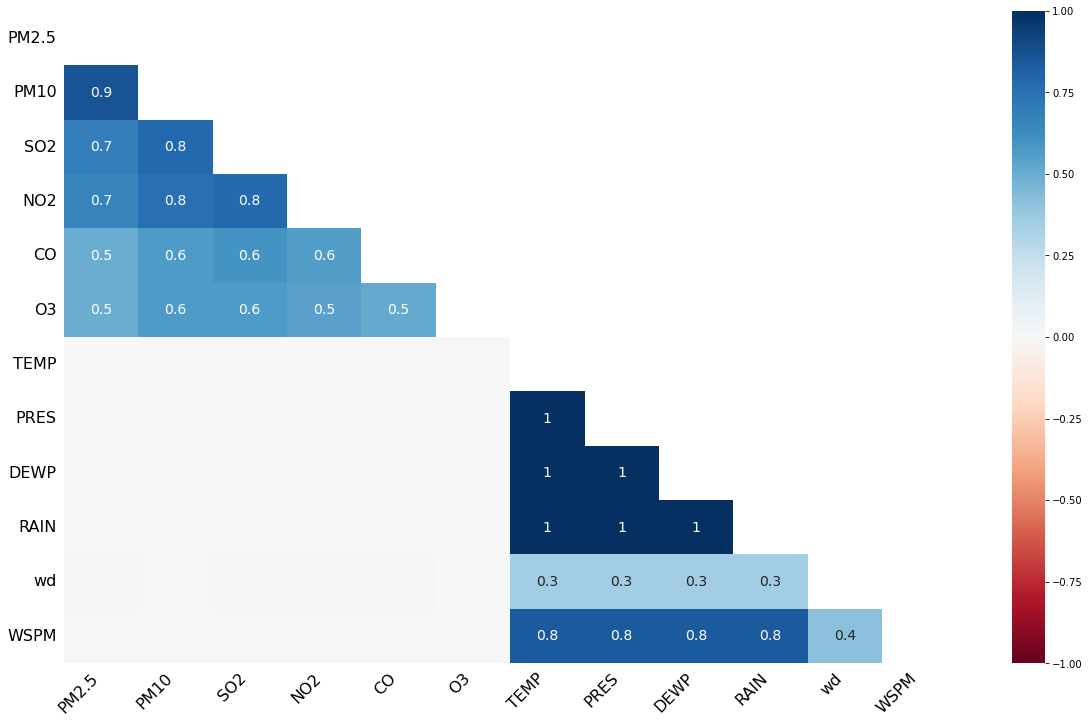

In [49]:
msno.heatmap(data)

<AxesSubplot:>

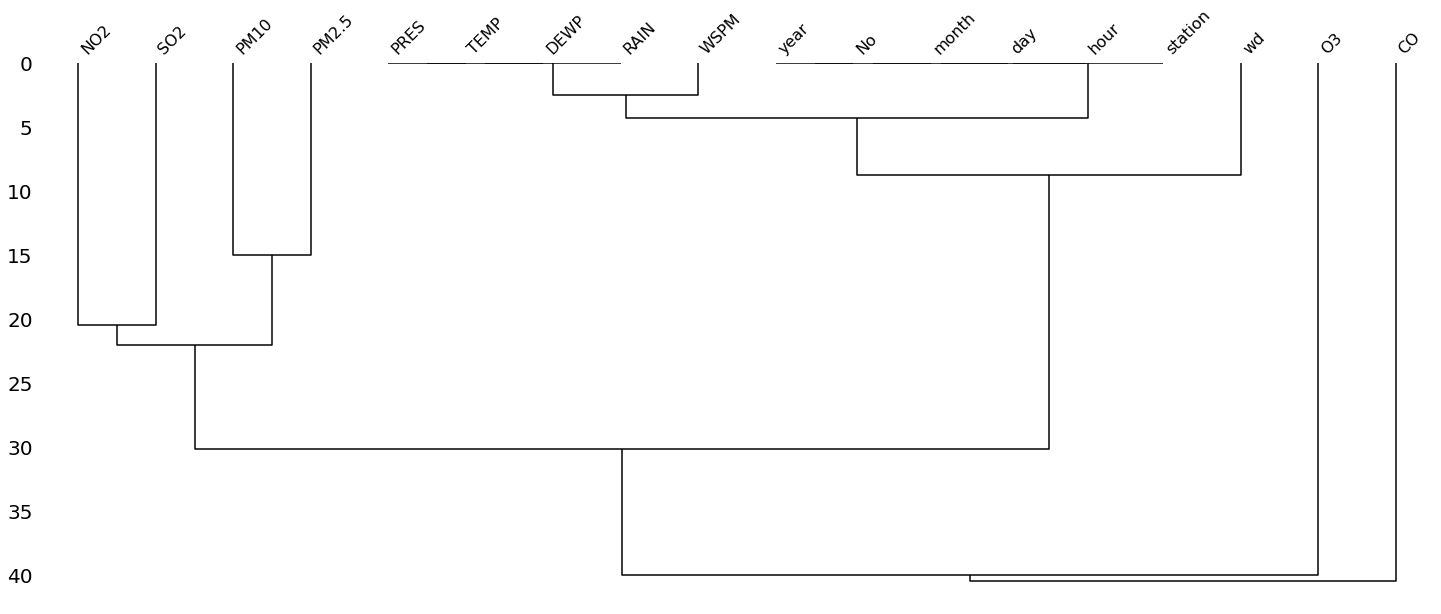

In [50]:
msno.dendrogram(data)

In [61]:
df.isnull().sum()

PM2.5    15
PM10     15
SO2      19
NO2      17
CO       31
O3       17
TEMP      0
PRES      0
DEWP      0
RAIN      0
WSPM      0
dtype: int64

Resampling to 24hours.

In [87]:
df = data.resample('D', on='date').mean()
dtest = test.resample('D', on='date').mean()

C:\Users\anush\AppData\Local\Temp/ipykernel_24064/4256626386.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = data.resample('D', on='date').mean()
C:\Users\anush\AppData\Local\Temp/ipykernel_24064/4256626386.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dtest = test.resample('D', on='date').mean()


In [89]:
df['AQI'] = df[['PM2.5','PM10','SO2','NO2','CO','O3']].max(axis =1)
dtest['AQI'] = df[['PM2.5','PM10','SO2','NO2','CO','O3']].max(axis =1)
df['target']= df.AQI.shift(-1) #target for next 24 hrs
dtest['target']= dtest.AQI.shift(-1)

In [ ]:
Missing Data Handling.

In [94]:
def imputation(df):
    scaler = MinMaxScaler()
    df = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)
    imputer = KNNImputer(n_neighbors=5)
    df = pd.DataFrame(imputer.fit_transform(df),columns = df.columns)
    return df

In [97]:
df= imputation(df)
dtest = imputation(dtest)

In [66]:
#df = train[['Var1']].copy()
#df['target']= train.Var1.shift(-1)

Checking linearity

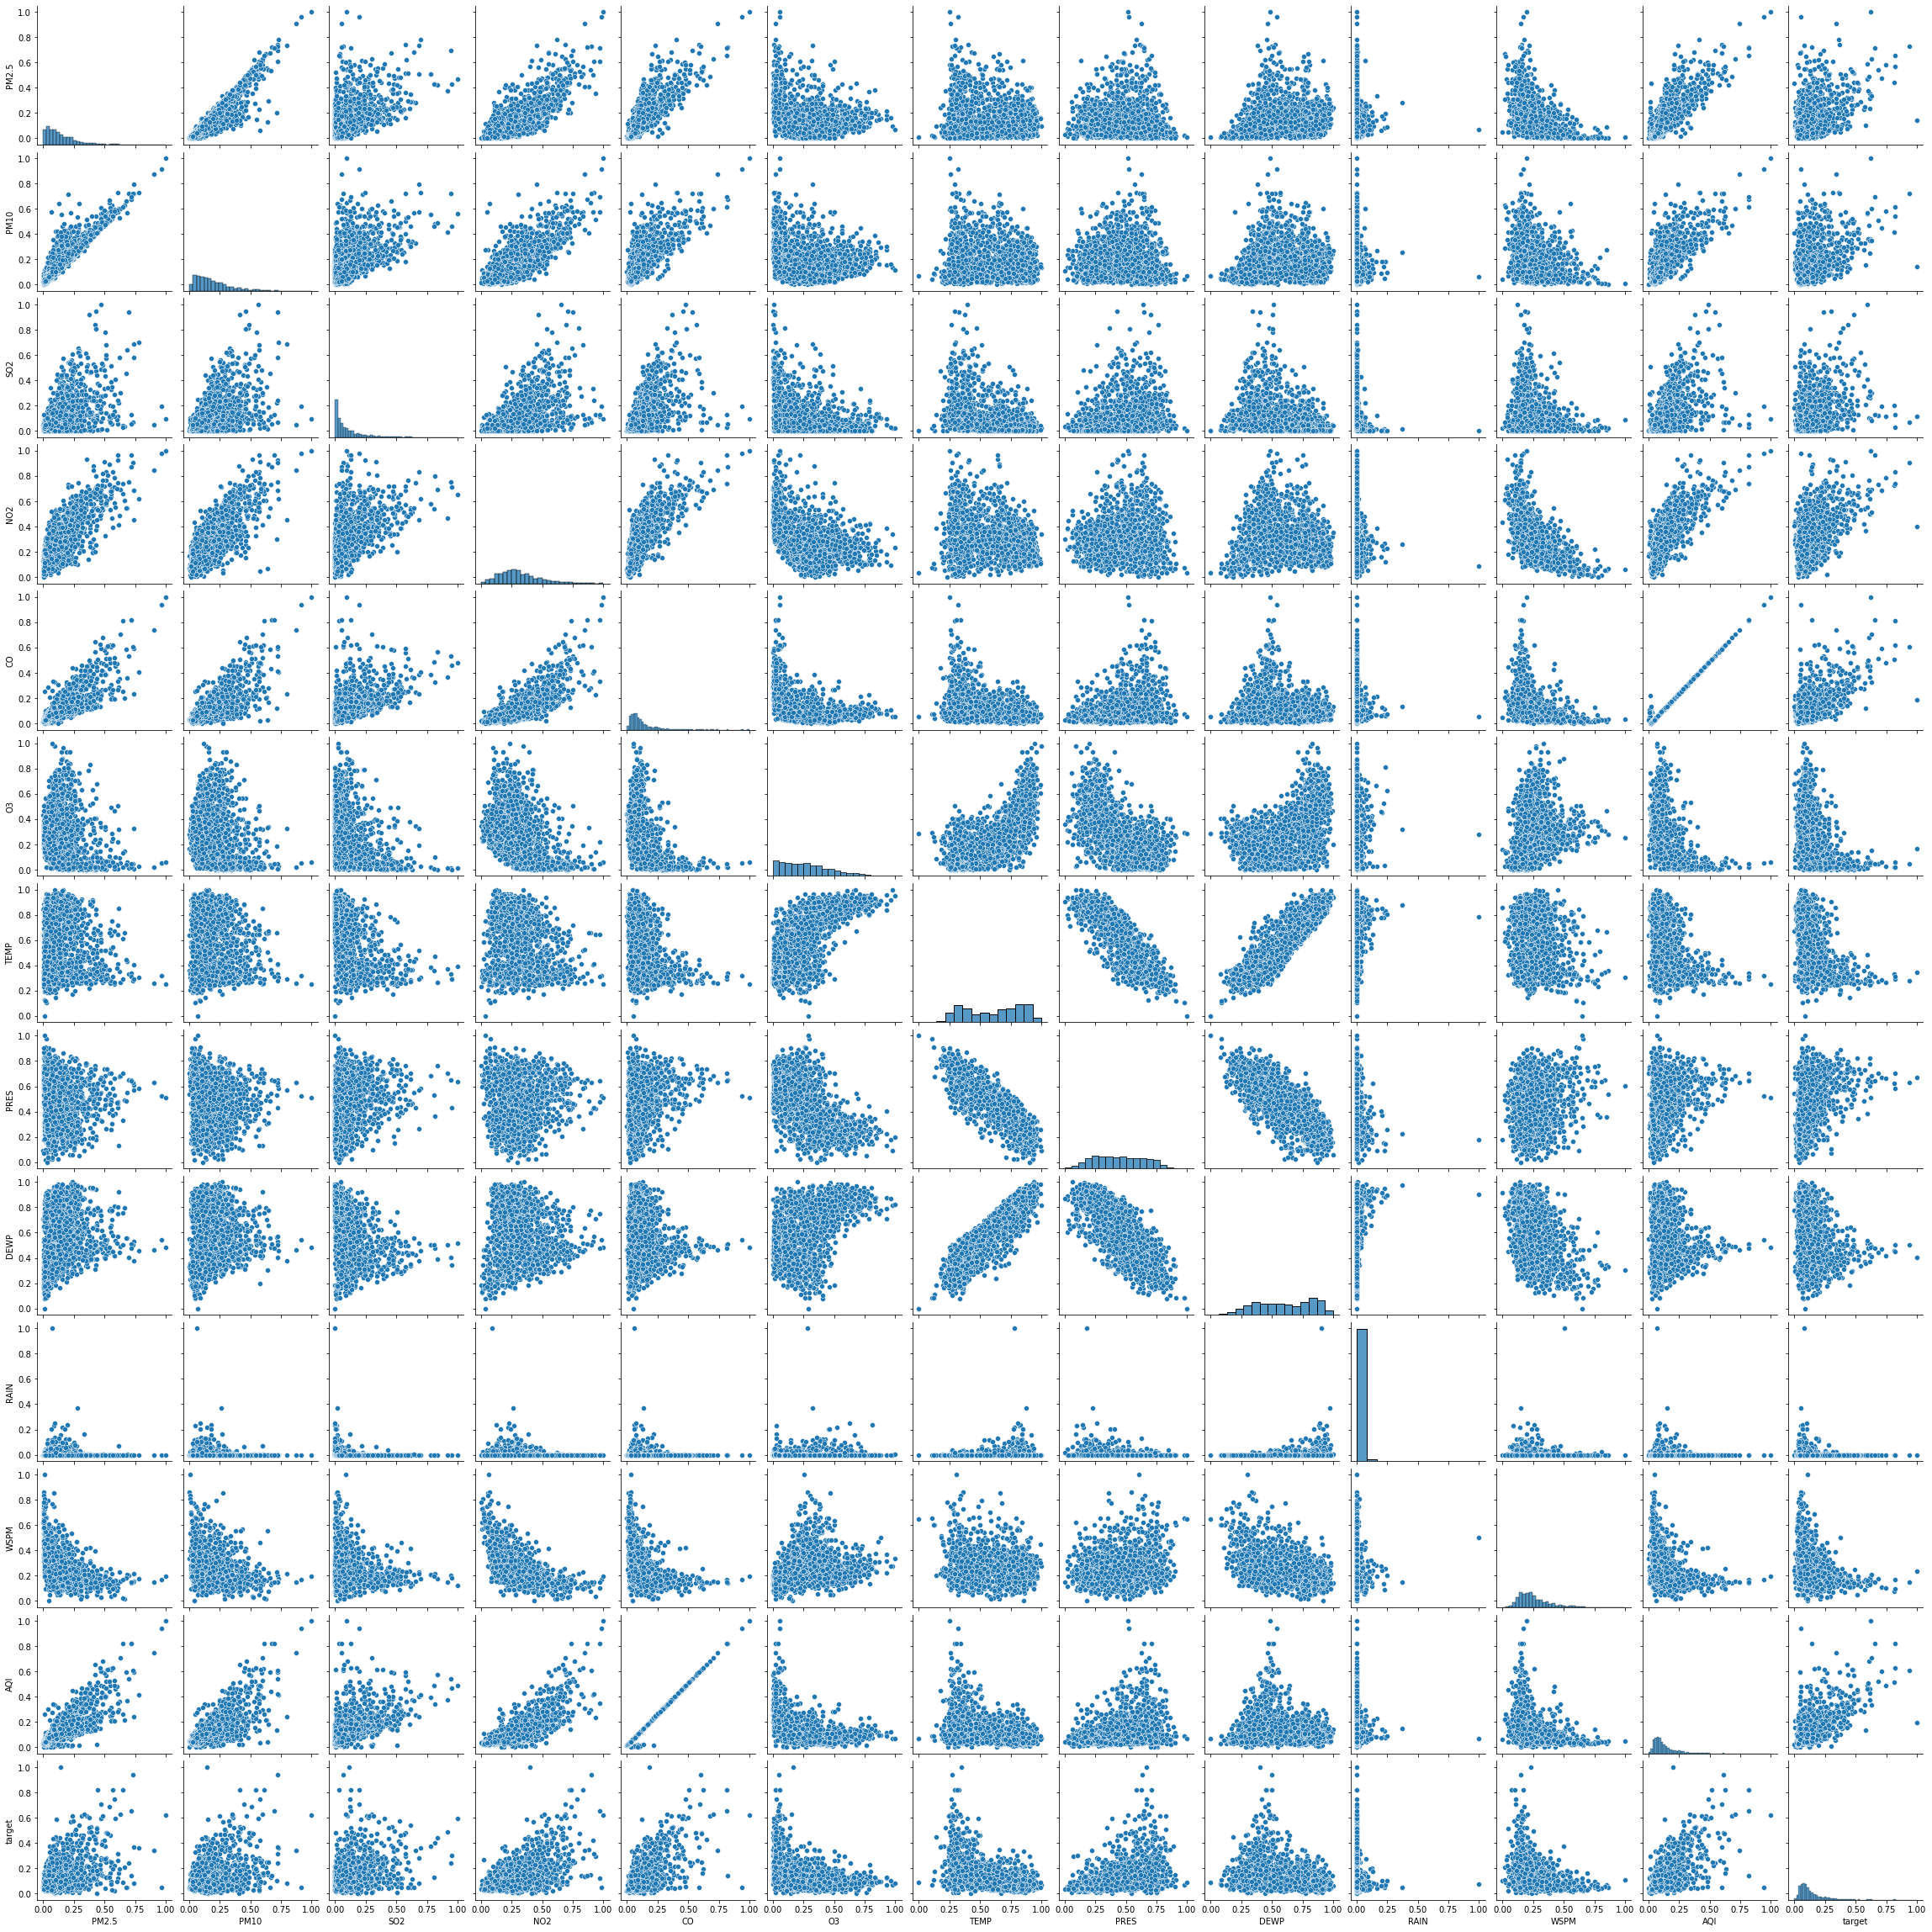

In [144]:
sns.pairplot(df)

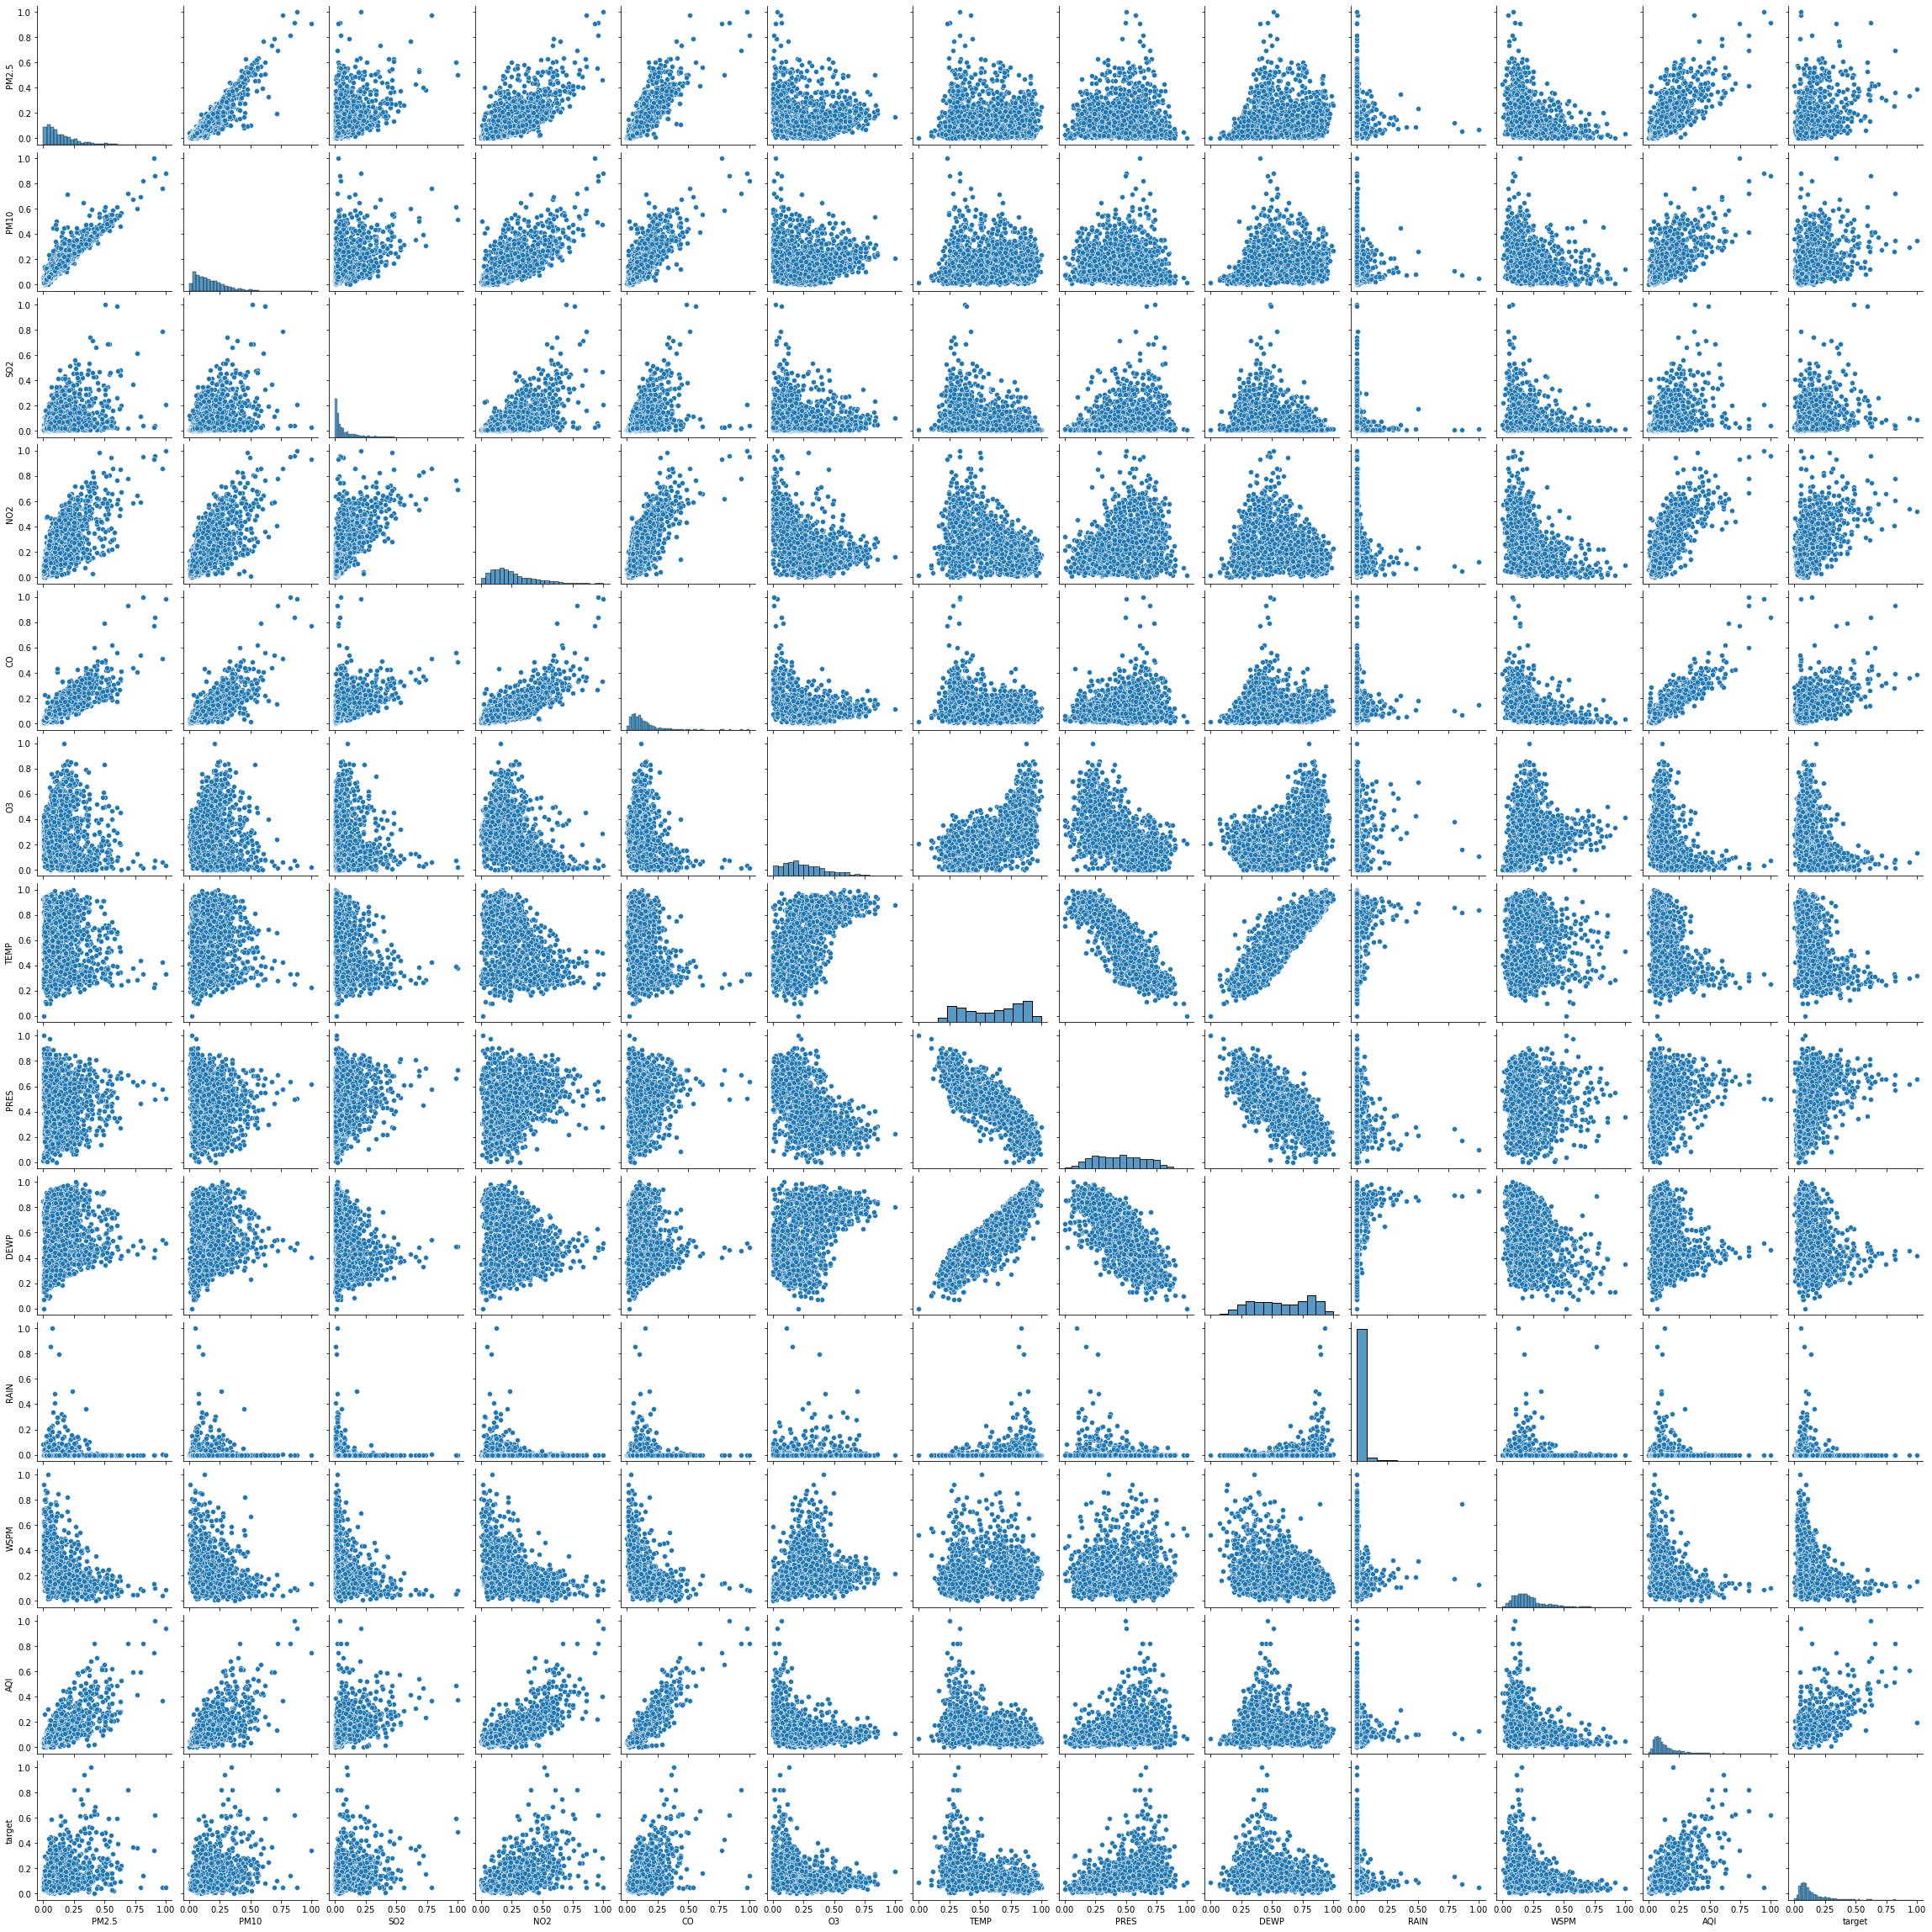

In [145]:
sns.pairplot(dtest)

Correlation Heatmap

C:\Users\anush\AppData\Local\Temp/ipykernel_24064/2189983311.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))


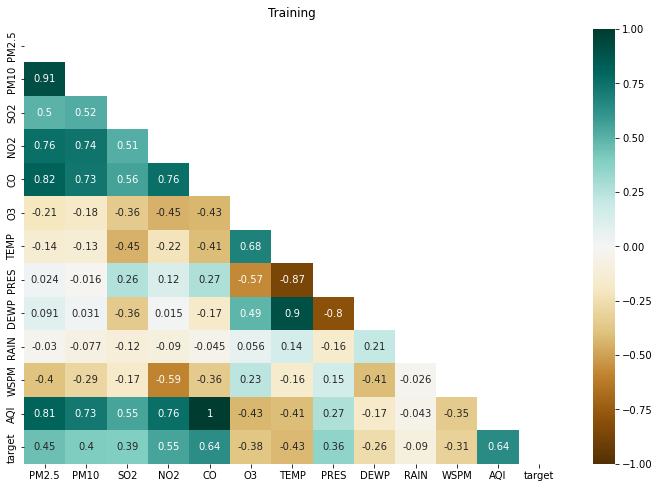

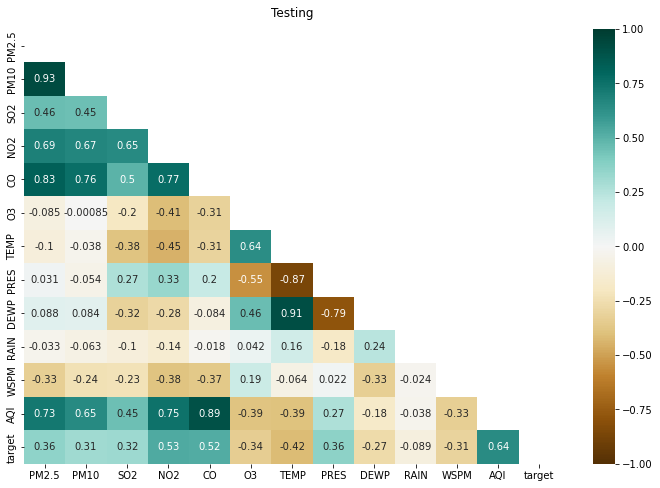

In [98]:
def heatmap(a,title):
    plt.figure(figsize=(12,8))
    mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
    heatmap = sns.heatmap(a, vmin = -1, vmax= 1, annot= True, cmap ='BrBG', mask = mask)
    heatmap.set_title(title, fontdict={'fontsize':12}, pad=12)
tncorr = df.corr()
ttcorr = dtest.corr()
heatmap(tncorr, title = 'Training')
heatmap(ttcorr, title = 'Testing')

In [146]:
#Prediction errors are normally distributed

Report of features: Correlation, Distribution, Interaction.

In [134]:
import pandas_profiling
from pandas_profiling import ProfileReport 
profile = ProfileReport (xtrain, title = 'Feature Importance', html = {'style': {'full_width': True }}) 
profile

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Feature Engineering

In [129]:
features = ['PM2.5', 'PRES','DEWP','WSPM']#aotizhongxin
target = 'target'
xtrain = df[['PM2.5', 'PRES','DEWP','WSPM']]
ytrain = df[target]
xtest = dtest[['PM2.5', 'PRES','DEWP','WSPM']]#Huaroi
ytest = dtest[target]
z_val, z_test, a_val, a_test = tts(xtest, ytest, test_size = 0.3)    #70:30 ratio split 

XGBoost

In [142]:
reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                           n_estimators=20000,
                           objective = 'reg:linear',
                           early_stopping_rounds=100,
                           max_depth=3,
                           learning_rate=0.0001)
model = reg.fit(xtrain, ytrain,
            eval_set=[(xtrain, ytrain), (z_val, a_val)],
            verbose=100)
a_testpreed = model.predict(z_test)
xgbmae = mean_absolute_error(a_testpreed, a_test)
xgbmse = mean_squared_error(a_testpreed, a_test)
xgbr = r2_score(a_testpreed, a_test)


[23:23:26] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:0.38055	validation_1-rmse:0.38260
[100]	validation_0-rmse:0.37698	validation_1-rmse:0.37907
[200]	validation_0-rmse:0.37346	validation_1-rmse:0.37559
[300]	validation_0-rmse:0.36997	validation_1-rmse:0.37214
[400]	validation_0-rmse:0.36651	validation_1-rmse:0.36872
[500]	validation_0-rmse:0.36309	validation_1-rmse:0.36534
[600]	validation_0-rmse:0.35971	validation_1-rmse:0.36200
[700]	validation_0-rmse:0.35637	validation_1-rmse:0.35870
[800]	validation_0-rmse:0.35306	validation_1-rmse:0.35543
[900]	validation_0-rmse:0.34978	validation_1-rmse:0.35220
[1000]	validation_0-rmse:0.34654	validation_1-rmse:0.34901
[1100]	validation_0-rmse:0.34333	validation_1-rmse:0.34585
[1200]	validation_0-rmse:0.34015	validation_1-rmse:0.34272
[1300]	validat

In [143]:
print(xgbmae,xgbmse,xgbr)

0.09038210734730762 0.012840324972088927 -1.0775371109591472


Linear Regression

In [140]:
LR = LinearRegression()
LR.fit(xtrain,ytrain)
ytrainpred = LR.predict(xtrain)
testpred = LR.predict(xtest)
mae = mean_absolute_error(testpred, ytest)
mse = mean_squared_error(testpred, ytest)
r = r2_score(testpred,ytest)
print(mae, mse, r)

0.06733867648909009 0.009492228035847318 -0.60148402203829


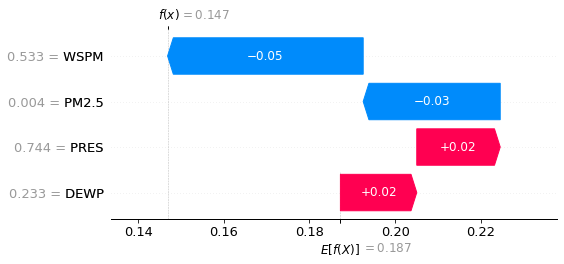

In [112]:
import shap
explainer = shap.Explainer(model)
shap_values = explainer(xtrain)
shap.plots.waterfall(shap_values[0])


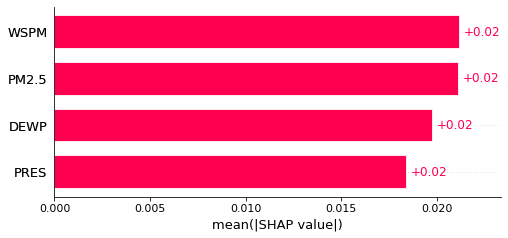

In [114]:
shap.plots.bar(shap_values)


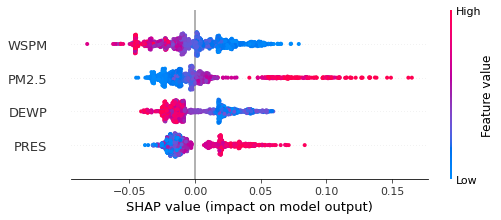

In [133]:
# summarize the effects of all the features
shap.plots.beeswarm(shap_values)